[![Binder](https://mybinder.org/badge_logo.svg)](https://lab.mlpack.org/v2/gh/mlpack/examples/master?urlpath=lab%2Ftree%2Fmovie_lens_prediction_with_cf%2Fmovie-lens-cf-py.ipynb)

In [1]:
# @file movie-lens-cf-py.ipynb
#
# A simple example usage of Collaborative Filtering (CF)
# applied to the MovieLens dataset.
# 
# https://grouplens.org/datasets/movielens/

In [2]:
import mlpack

In [3]:
import pandas as pd
import numpy as np
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# Load the MovieLens small data from an online URL.
!rm -rf ml-latest-small && wget -q -O tmp.zip https://datasets.mlpack.org/MovieLens-small.zip && unzip tmp.zip && rm tmp.zip

Archive:  tmp.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [5]:
# The MovieLens dataset contains a set of movie ratings from the MovieLens website,
# a movie recommendation service. This dataset was collected and maintained by
# GroupLens, a research group at the University of Minnesota.
#
# There are 5 versions included: "25m", "latest-small", "100k", "1m", "20m".
#
# In this example, we are working on the "latest-small" dataset,
# which is a small subset of the latest version of the MovieLens dataset.
# It is changed and updated over time by GroupLens.
#
# The dataset has 100,000 ratings and 3,600 tag applications applied
# to 9,000 movies by 600 users.

# Load ratings file, ignore the timestamp column.
ratings = pd.read_csv('ml-latest-small/ratings.csv', usecols=['userId', 'movieId', 'rating'])

# Load movies file.
movies = pd.read_csv('ml-latest-small/movies.csv')

In [6]:
# Print the first 10 rows of the ratings data.
ratings.head(10)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
5,1,70,3.0
6,1,101,5.0
7,1,110,4.0
8,1,151,5.0
9,1,157,5.0


We can see that user 1 has rated the movie with the id 1, 3 and 6 with a rating of 4.0;
rated the movies with the id's 47, 50, 101, 151 and 157 with a 5.0 and rated the movie
with the id 70 with 3.0.

In [7]:
# Print the first 10 rows of the movies data.
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


This dataset contains attributes of the 9700 movies.
There are 3 columns including the movie ID, their titles, and their genres.
Genres are separated and selected from 18 genres (Action, Adventure, Animation,
Children's, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror,
Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western).

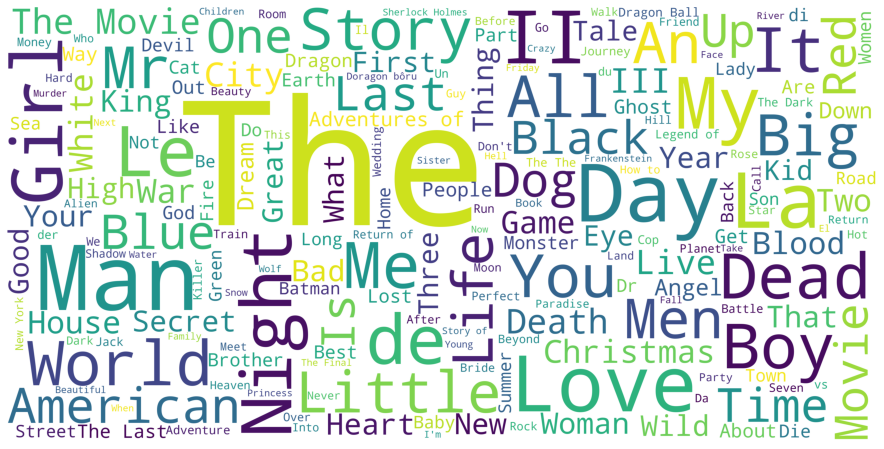

In [8]:
# Create a wordcloud of the movie titles.
movies_corpus = ' '.join(movies['title'])
movies_word_cloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(movies_corpus)

# Plot the movies wordcloud.
plt.figure(figsize=(16, 8))
plt.imshow(movies_word_cloud)
plt.axis('off')
plt.show()

The, Man, Love, Dead, Day are among the most commonly occuring words in movie titles.

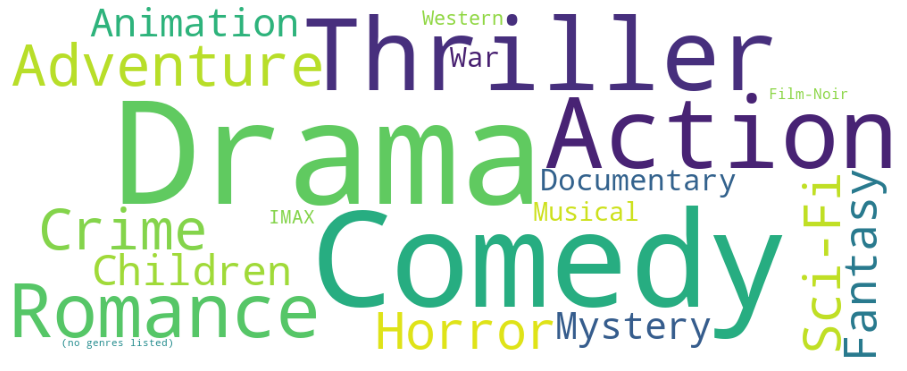

In [9]:
# Create a wordcloud of the movie genres.
genres_frequency = {}
for genre in movies['genres']:
    genre = genre.split('|')
    for g in genre:
        if g in genres_frequency:
            genres_frequency[g] += 1
        else:
            genres_frequency[g] = 1

genre_wordcloud = WordCloud(width=1000, height=400, background_color='white')
genres_word_cloud = genre_wordcloud.generate_from_frequencies(genres_frequency)

# Plot the genres wordcloud.
plt.figure(figsize=(16,8))
plt.imshow(genres_word_cloud)
plt.axis('off')
plt.show()

Drama, Comedy and Action are among the most commonly occuring movie genres.

In [10]:
# Get summary statistics of the ratings.
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

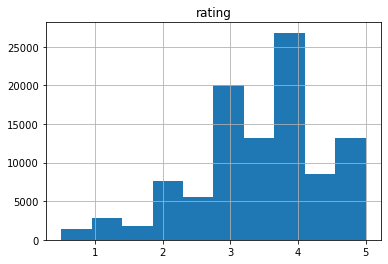

In [11]:
ratings.hist(column='rating')

The mean rating is 3.5 on a scale of 5. Half the movies have a rating of 3 and 4.

In [12]:
# Hold out 10% of the dataset into a test set so we can evaluate performance.
output = mlpack.preprocess_split(input_=ratings, test_ratio=0.1, verbose=True)
ratings_train = output['training']
ratings_test = output['test']

In [13]:
# Train the model. Change the rank to increase/decrease the complexity
# of the model.
#
# For more information checkout https://www.mlpack.org/doc/stable/python_documentation.html#cf
# or uncomment the line below.
# mlpack.cf?
output = mlpack.cf(training=ratings_train,
                   test=ratings_test,
                   rank=10,
                   verbose=True,
                   algorithm='RegSVD')
cf_model = output['output_model']

In [14]:
# Now query the 10 top movies for user 1.
output = mlpack.cf(input_model=cf_model,
                   query=[[2]],
                   recommendations=10,
                   verbose=True)

In [15]:
# Get the names of the movies for user 2.
print("Recommendations for user 2:")
for i in range(10):
  print("  " + str(i) + ": " + str(movies.loc[movies['movieId'] ==
      output['output'][0, i]].iloc[0]['title']))

Recommendations for user 2:
  0: Short Cuts (1993)
  1: Isle of Dogs (2018)
  2: Barbarella (1968)
  3: Mannequin (1987)
  4: Easy Money (1983)
  5: Rambo: First Blood Part II (1985)
  6: Louis C.K.: Chewed Up (2008)
  7: CB4 - The Movie (1993)
  8: West Side Story (1961)
  9: Minnie and Moskowitz (1971)


In [16]:
# Print the movie ratings for user 2 from the dataset.
print("Ratings for user 2:")
user_rating = ratings.loc[ratings['userId'] == 2]
for i, id in enumerate(user_rating['movieId']):
    title = movies.loc[movies['movieId'] == id]['title']
    print('  ' + str(i) + ': ' + str(user_rating.iloc[i, 2]) + ' - ' + list(title)[0])

Ratings for user 2:
  0: 3.0 - Shawshank Redemption, The (1994)
  1: 4.0 - Tommy Boy (1995)
  2: 4.5 - Good Will Hunting (1997)
  3: 4.0 - Gladiator (2000)
  4: 4.0 - Kill Bill: Vol. 1 (2003)
  5: 3.5 - Collateral (2004)
  6: 4.0 - Talladega Nights: The Ballad of Ricky Bobby (2006)
  7: 4.0 - Departed, The (2006)
  8: 4.5 - Dark Knight, The (2008)
  9: 5.0 - Step Brothers (2008)
  10: 4.5 - Inglourious Basterds (2009)
  11: 3.0 - Zombieland (2009)
  12: 4.0 - Shutter Island (2010)
  13: 3.0 - Exit Through the Gift Shop (2010)
  14: 4.0 - Inception (2010)
  15: 4.5 - Town, The (2010)
  16: 5.0 - Inside Job (2010)
  17: 4.0 - Louis C.K.: Hilarious (2010)
  18: 5.0 - Warrior (2011)
  19: 3.5 - Dark Knight Rises, The (2012)
  20: 2.5 - Girl with the Dragon Tattoo, The (2011)
  21: 3.5 - Django Unchained (2012)
  22: 5.0 - Wolf of Wall Street, The (2013)
  23: 3.0 - Interstellar (2014)
  24: 4.0 - Whiplash (2014)
  25: 2.0 - The Drop (2014)
  26: 3.5 - Ex Machina (2015)
  27: 5.0 - Mad Max:

Here is some example output, showing that user 2 seems to have an interesting taste in movies.